<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

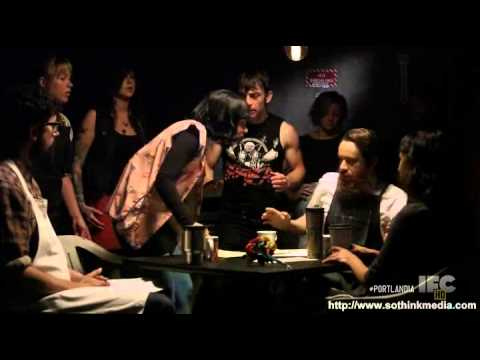

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/felix/projects/school/unit_4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
print(shops.shape)

(7616, 3)


In [5]:
print(shops.iloc[0]['full_review_text'])

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 


In [6]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [7]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

Okay, looks like I need to pull out the date, and maybe a checkin flag from the review.  The name looks fine, and the star rating should probably just be a number.
* date can be split on spaces maybe, but leading space might be a problem
* Check in can be figured out with a .find() and a .apply()
* stars can be split on . and converted to an integer

In [8]:
#Okay lets take a stab at getting the star rating, that should be easy enough
shops['star_rating_clean'] = shops.apply(lambda x: int(x['star_rating'][:2]), axis = 1)

shops['star_rating_clean'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating_clean, dtype: int64

In [9]:
# lets pull the date out
shops['date_clean'] = shops.apply(lambda x: x['full_review_text'].strip().split()[0], axis = 1)

shops['date_clean'].value_counts()

10/9/2016     31
9/18/2016     30
11/2/2016     27
11/20/2016    27
12/2/2016     26
              ..
3/27/2009      1
5/5/2011       1
6/14/2014      1
3/20/2013      1
7/6/2009       1
Name: date_clean, Length: 1592, dtype: int64

In [10]:
#Okay easy enough.  I want a cleaned review text too though.
#So I'm going to replace the date in the string with nothing, then strip all
#leading and trailing spaces and store that as a temporarily cleaned text
shops['review_text_clean'] = shops.apply(lambda x: x['full_review_text'].replace(x['date_clean'], '').strip(), axis = 1)

shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date_clean,review_text_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,1 check-in They are located within the Northcr...


In [11]:
#looking good, lets convert that date now
shops['date_clean'] = pd.to_datetime(shops['date_clean'])

print(shops['date_clean'].dtypes)
shops.head()

datetime64[ns]


,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date_clean,review_text_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,2016-11-25,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,2016-11-25,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,2016-12-03,1 check-in They are located within the Northcr...


In [12]:
def check_in_finder(row):
    '''
    Find if a review has a check-in.  Returns # of check-ins. Also cleans the
    review_text_clean even further.
    '''
    loc = row['review_text_clean'].find('check-in')
    
    #15 is kinda arbitrary, I just found that I was getting "false" checkins
    #from reviews that had "check-in" in them
    if (loc >= 0) and (loc <= 15):
        
        checkin = row['review_text_clean'][:15].split()[0]
        
        return int(checkin)
    else:
        return 0
    
def check_in_cleaner(row):
    '''
    Further clean the review text
    '''
    
    return row['review_text_clean'].replace(str(row['check_in']) + ' check-in', '').strip()

In [13]:
shops['check_in'] = shops.apply(check_in_finder, axis = 1)

shops['check_in'].value_counts()

0      4730
1      1933
2       369
3       151
4       100
       ... 
73        1
61        1
53        1
45        1
109       1
Name: check_in, Length: 62, dtype: int64

In [14]:
shops['review_text_clean'] = shops.apply(check_in_cleaner, axis = 1)

In [15]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date_clean,review_text_clean,check_in
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,2016-11-25,Love love loved the atmosphere! Every corner o...,1
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,2016-11-30,Listed in Brunch Spots I loved the eclectic an...,1
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,2016-11-25,Very cool decor! Good drinks Nice seating How...,0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,2016-12-03,They are located within the Northcross mall sh...,1


### Tokens
I've cleaned the data as much as seems reasonable.  So lets set out a couple more goals before we get into the analysis
* Tokenize the cleaned review
* remove stop words when tokenizing
* Lemmatize the remaining tokens

In [16]:
# Tokenizing & stop words
# I'm going to stick with just dictionary stop words, and put a stretch TODO to
# do statistical stop word removal
import spacy
from spacy.tokenizer import Tokenizer

#I'm instantiating my spaCy natural language processing model with the
# english core, large version.  See spaCy docs for more model options
nlp = spacy.load("en_core_web_lg")

#setting a few manual stop words, that spaCy doesn't recognize
nlp.vocab["it's"].is_stop = True
nlp.vocab["It's"].is_stop = True
nlp.vocab["i'm"].is_stop = True
nlp.vocab["i've"].is_stop = True
nlp.vocab["I'm"].is_stop = True
nlp.vocab["I've"].is_stop = True

#I'm adding these to the stop words, because they aren't super useful in
#analyzing "coffee places"  They are going to show up a lot
nlp.vocab['Coffee'].is_stop = True
nlp.vocab['coffee'].is_stop = True
nlp.vocab['Place'].is_stop = True
nlp.vocab['place'].is_stop = True

#there is a rogue S messing up my final visualizations
nlp.vocab['s'].is_stop = True
nlp.vocab['S'].is_stop = True

#I'm instantiating a spaCy tokenizer, rather than make my own tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [17]:
tokens = []

# I'm using spaCy's tokenizer pipeline to feed in the raw text.  SpaCy is taking
# that text and creating a "document" which is an object containing a sequency
# of tokens
for doc in tokenizer.pipe(shops['review_text_clean'], batch_size = 1000):
    
    # if I were just looking for tokens, I could do that by just extracting the
    # text of the tokens from the spacy docs sequency of tokens
    # doc_tokens = [token.text for token in doc]
    
    #but we want lemmas, without stop words, or punctuation
    lemmas = []
    
    # looping through each token, check if it is a stop word (spaCy has their 
    # own list of stop words) or punctuation or it is pronoun. If it is none,
    # we add it to our list of lemmatized tokens
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.is_space == False):
            lemmas.append(token.lemma_.lower())
    
    # now we take our lemmas list for the specific row in the dataframe, and we
    # are adding it to our overall list to become the sequence we add to our 
    # dataframe as a column
    tokens.append(lemmas)

shops['tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date_clean,review_text_clean,check_in,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,2016-11-25,Love love loved the atmosphere! Every corner o...,1,"[love, love, love, atmosphere!, corner, shop, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",0,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,2016-11-30,Listed in Brunch Spots I loved the eclectic an...,1,"[listed, brunch, spots, love, eclectic, homey,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,2016-11-25,Very cool decor! Good drinks Nice seating How...,0,"[cool, decor!, good, drink, nice, seat, howeve..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,2016-12-03,They are located within the Northcross mall sh...,1,"[locate, northcross, mall, shop, center, face,..."


### Lemma
For future me, Lemma is the base form of a word.  walking becomes walk, verbs are all transformed to transitive.



## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [18]:
#Okay so we are going to have to do a bunch of computation to get this so lets
#go ahead and make a helperfuction to just crank out what I want to see.  Then
#I can use dataframe filtering to filter by the coffee shops, their ranking,
#check ins etc
from collections import Counter

def count(docs):
    '''
    Takes a list of lists containing tokens (doc) and returns a dataframe with 
    word, word counts, ranks, percentage the word occurs across all documents, 
    the cumulative sum of the percentages ordered by rank, the pecentage of 
    documents that the word appears in
    '''
    
    #instantiating to two counters. These can take an series like our documents
    #(a list of tokens), and perform all the standard iterable methods.  This
    #will save me from reinventing the wheel for some very simple math
    word_counts = Counter()
    appears_in = Counter()
    
    #we'll use this later for calculating the percent of documents a word occurs
    total_docs = len(docs)
    
    #loop through each doc (list of tokens from the review), and feed them into
    #our counter so we can use iterable methods
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    #here I am taking my counters and extracting the tokens, and the counts that
    #each token appears, then I'm uzing the zip function to  turn that into a
    #list of tuples, for easier dataframe creation
    temp = zip(word_counts.keys(), word_counts.values())
    
    df = pd.DataFrame(temp, columns = ['word', 'count'])
    
    #using the built in pandas rank method to generate a rank column
    df['rank'] = df['count'].rank(method = 'first', ascending = False)
    
    #self explanitory, figuring out the percent a word occurs accross all docs
    total = df['count'].sum()
    df['percent_total'] = df['count'].apply(lambda x: x / total)
    
    #sorting the dataframe by rank
    df = df.sort_values(by = 'rank')
    
    #calculating the cumulative sum sequence of the percentages(sorted by rank)
    df['cumulative_sum_percent_total'] = df['percent_total'].cumsum()
    
    #making a list of tuples of the words, and their counts. But because we 
    #cast or original documents as a set, the words are only counted once per
    #document (remember set theory doesn't have duplicates).
    temp2 = zip(appears_in.keys(), appears_in.values())
    appears_df = pd.DataFrame(temp2, columns = ['word', 'appears_in'])
    
    #merge them on the word column to make one useful dataframe
    df = appears_df.merge(df, on = 'word')
    
    df['appears_in_percent'] = df['appears_in'].apply(lambda x: x / total_docs)
    
    return df.sort_values(by = 'rank')

### Lets do a count on every review there is

In [19]:
# Lets take a stab at the overall word count for all reviews

wc_all = count(shops['tokens'])
print(wc_all.shape)
wc_all.head()

(35903, 7)


,word,appears_in,count,rank,percent_total,cumulative_sum_percent_total,appears_in_percent
103,great,2454,3272,1.0,0.008933,0.008933,0.322216
150,like,2166,3147,2.0,0.008592,0.017526,0.284401
156,good,2158,2896,3.0,0.007907,0.025433,0.283351
489,come,1829,2439,4.0,0.006659,0.032092,0.240152
31,love,1689,2161,5.0,0.005900,0.037992,0.221770


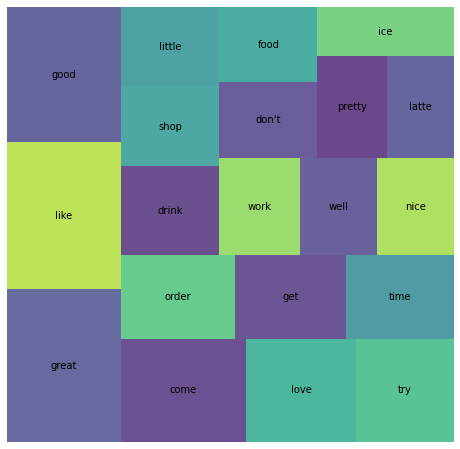

In [20]:
import squarify
import matplotlib.pyplot as plt

all_top20 = wc_all[wc_all['rank'] <= 20]
plt.figure(figsize = (8,8))
squarify.plot(sizes = all_top20['percent_total'], label = all_top20['word'], alpha = .8)
plt.axis('off')
plt.show();

As you'd expect when reviewing coffe places, 'coffee' and 'place' are the two most frequently occuring tokens.  Great, Like, good, love are all pretty high up there like you'd expect.

## Good coffee shops
Ranked 4 stars or highers

In [21]:
#Lets look at a "good" coffee shop
wc_good = count(shops[shops['star_rating_clean'] >= 4]['tokens'])
print(wc_good.shape)
wc_good.head()

(30311, 7)


,word,appears_in,count,rank,percent_total,cumulative_sum_percent_total,appears_in_percent
103,great,2186,2919,1.0,0.010262,0.010262,0.356026
243,good,1706,2272,2.0,0.007987,0.018249,0.277850
188,like,1595,2259,3.0,0.007942,0.026191,0.259772
31,love,1488,1918,4.0,0.006743,0.032934,0.242345
440,come,1395,1832,5.0,0.006440,0.039374,0.227199


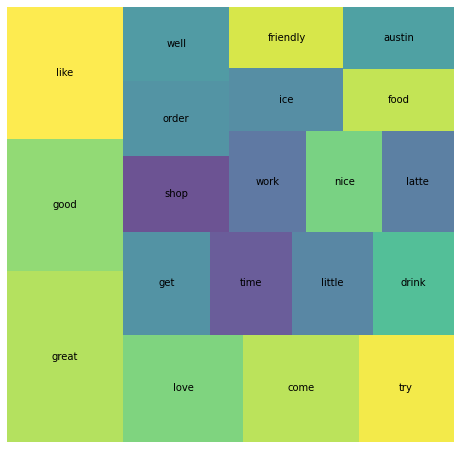

In [22]:
good_top20 = wc_good[wc_good['rank'] <= 20]
plt.figure(figsize = (8,8))
squarify.plot(sizes = good_top20['percent_total'], label = good_top20['word'], alpha = .8)
plt.axis('off')
plt.show();

## Bad Coffee shops
3 or lower star rating

In [23]:
#Lets look at a "good" coffee shop
wc_bad = count(shops[shops['star_rating_clean'] < 4]['tokens'])
print(wc_bad.shape)
wc_bad.head()

(14115, 7)


,word,appears_in,count,rank,percent_total,cumulative_sum_percent_total,appears_in_percent
0,like,571,888,1.0,0.010854,0.010854,0.386856
6,good,452,624,2.0,0.007627,0.018482,0.306233
164,order,381,621,3.0,0.007591,0.026072,0.258130
81,come,434,607,4.0,0.007420,0.033492,0.294038
240,time,320,442,5.0,0.005403,0.038895,0.216802


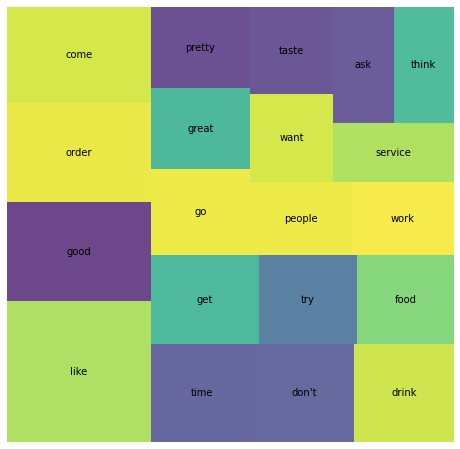

In [24]:
bad_top20 = wc_bad[wc_bad['rank'] <= 20]
plt.figure(figsize = (8,8))
squarify.plot(sizes = bad_top20['percent_total'], label = bad_top20['word'], alpha = .8)
plt.axis('off')
plt.show();

First thing I notice is a significant different between the shapes and sizes of great in these graphs. Great is much bigger in the good graph.  Also 'don't' shows up in the bad graph, and is not present in the good graph.  Very cool comparisons.

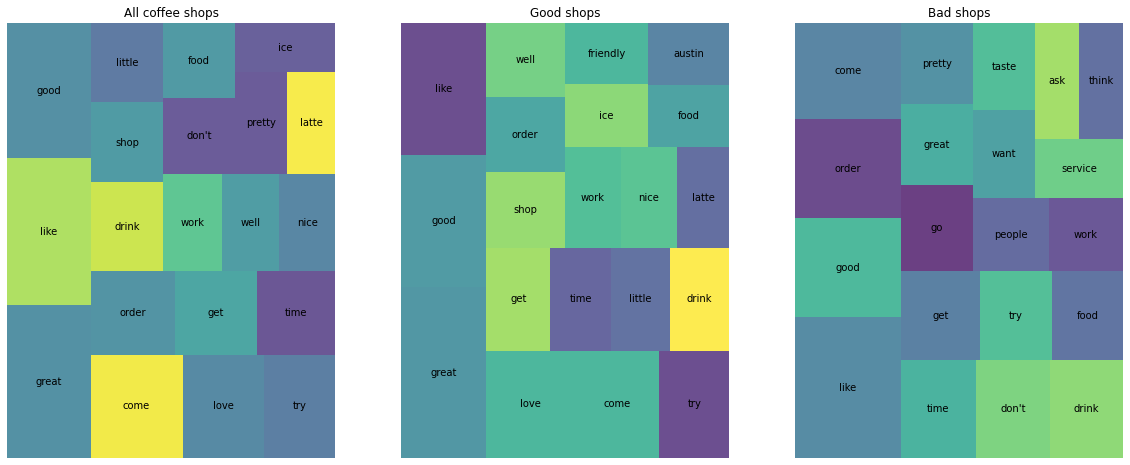

In [25]:
#side by side to show that I can

fig, axes = plt.subplots(1, 3, figsize = (20, 8))

axes[0].set_title('All coffee shops')
squarify.plot(sizes = all_top20['percent_total'], label = all_top20['word'], alpha = .8, ax = axes[0])
axes[0].axis('off')

axes[1].set_title('Good shops')
squarify.plot(sizes = good_top20['percent_total'], label = good_top20['word'], alpha = .8, ax = axes[1])
axes[1].axis('off')

axes[2].set_title('Bad shops')
squarify.plot(sizes = bad_top20['percent_total'], label = bad_top20['word'], alpha = .8, ax = axes[2])
axes[2].axis('off')

plt.show();

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [26]:
#okay there is a huge difference in the number of good and bad reviewed places
#so here is where the appears in percentage will help.  That is effectively
#normalized per document.  So between good and bad, I want the largest
#difference in that specific column

#there might be a more clever way to do this, but it seems like I can

mega = wc_good.merge(wc_bad, on = 'word')
print(mega.shape)
mega.head()

(8523, 13)


,word,appears_in_x,count_x,rank_x,percent_total_x,cumulative_sum_percent_total_x,appears_in_percent_x,appears_in_y,count_y,rank_y,percent_total_y,cumulative_sum_percent_total_y,appears_in_percent_y
0,great,2186,2919,1.0,0.010262,0.010262,0.356026,268,353,12.0,0.004315,0.072631,0.181572
1,good,1706,2272,2.0,0.007987,0.018249,0.277850,452,624,2.0,0.007627,0.018482,0.306233
2,like,1595,2259,3.0,0.007942,0.026191,0.259772,571,888,1.0,0.010854,0.010854,0.386856
3,love,1488,1918,4.0,0.006743,0.032934,0.242345,201,243,29.0,0.002970,0.133295,0.136179
4,come,1395,1832,5.0,0.006440,0.039374,0.227199,434,607,4.0,0.007420,0.033492,0.294038


In [27]:
mega['diff'] = mega.apply(lambda x: abs(x['appears_in_percent_x'] - x['appears_in_percent_y']), axis = 1)

mega = mega.sort_values(by = 'diff', ascending = False)
mega.head()

,word,appears_in_x,count_x,rank_x,percent_total_x,cumulative_sum_percent_total_x,appears_in_percent_x,appears_in_y,count_y,rank_y,percent_total_y,cumulative_sum_percent_total_y,appears_in_percent_y,diff
0,great,2186,2919,1.0,0.010262,0.010262,0.356026,268,353,12.0,0.004315,0.072631,0.181572,0.174454
2,like,1595,2259,3.0,0.007942,0.026191,0.259772,571,888,1.0,0.010854,0.010854,0.386856,0.127084
11,order,903,1185,12.0,0.004166,0.070789,0.147068,381,621,3.0,0.007591,0.026072,0.258130,0.111062
3,love,1488,1918,4.0,0.006743,0.032934,0.242345,201,243,29.0,0.002970,0.133295,0.136179,0.106166
22,don't,793,965,23.0,0.003392,0.111604,0.129153,340,430,6.0,0.005256,0.044151,0.230352,0.101199


In [28]:
top10 = mega['word'][:10]

top10

0          great
2           like
11         order
3           love
22         don't
133          ask
51       service
74        didn't
17      friendly
43     delicious
Name: word, dtype: object

## Good vs Bad word usage
Comparing the top 10 different usage of words between good and bad reviews

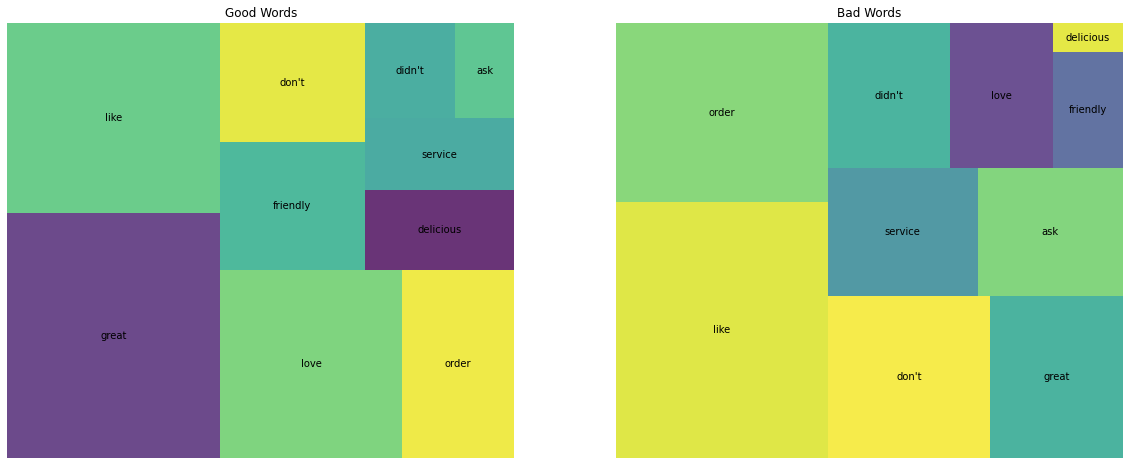

In [29]:
good_10_diff = wc_good.loc[wc_good['word'].isin(top10)]
bad_10_diff = wc_bad.loc[wc_bad['word'].isin(top10)]

fig, axes = plt.subplots(1, 2, figsize = (20, 8))

axes[0].set_title('Good Words')
squarify.plot(sizes = good_10_diff['percent_total'], label = good_10_diff['word'], alpha = .8, ax = axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Words')
squarify.plot(sizes = bad_10_diff['percent_total'], label = bad_10_diff['word'], alpha = .8, ax = axes[1])
axes[1].axis('off')

plt.show();

## Conclusion
We can see a pretty big difference in the way that people use words like 'Great', 'love', 'friendly', 'service'.  Very cool

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

